In [1]:
! pip install matplotlib
! pip install pyspark
! pip install pandas
! pip install pmdarima
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=0dc96680abc5ad13129188cd7a30ae0e40e904cda623836b7e48499f7a7e72ad
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.5 MB/s eta 0:00:00


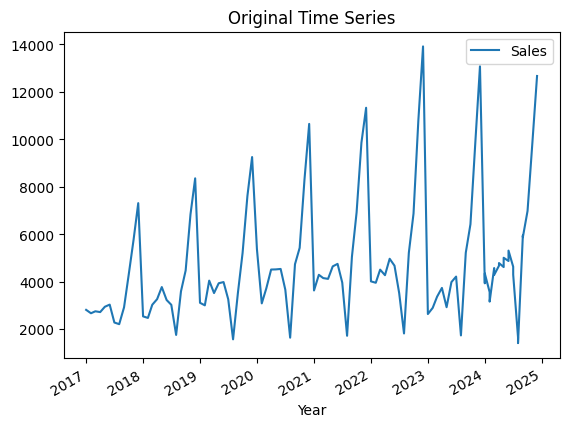

ADF Test Result: (0.01, False)
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1183.693, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1173.736, Time=0.80 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1157.042, Time=0.91 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1155.109, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1157.009, Time=1.60 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1158.348, Time=0.71 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1155.379, Time=0.18 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1155.138, Time=0.16 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1173.612, Time=0.05 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1155.790, Time=0.27 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 5.173 seconds


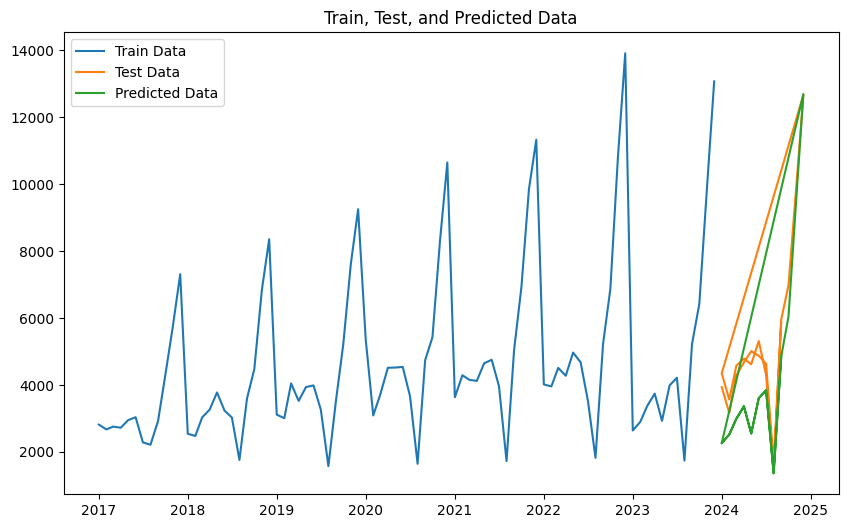

In [3]:
# Step 1: Install necessary libraries
!pip install pmdarima  # ติดตั้งไลบรารี pmdarima สำหรับการสร้างโมเดล ARIMA

# Step 2: Import necessary libraries
import pandas as pd  # สำหรับการจัดการข้อมูล
import numpy as np  # สำหรับการทำงานกับอาเรย์และคณิตศาสตร์
import matplotlib.pyplot as plt  # สำหรับการสร้างกราฟ
from pmdarima import auto_arima  # สำหรับการสร้างโมเดล ARIMA อัตโนมัติ
from pmdarima.arima import ADFTest  # สำหรับการตรวจสอบความเป็นสถานะ

# Step 3: Load your dataset from the specified path
df = pd.read_csv('year_sales.csv')  # โหลดข้อมูลจากไฟล์ CSV

# Step 4: Convert the 'Year' column to datetime and set it as the index
df['Year'] = pd.to_datetime(df['Year'])  # แปลงคอลัมน์ Year เป็น datetime
df.set_index('Year', inplace=True)  # ตั้งคอลัมน์ Year เป็น index ของ DataFrame

# Step 5: Plot the data to see the time series
df.plot()  # แสดงกราฟของข้อมูลเพื่อดูแนวโน้ม
plt.title("Original Time Series")  # ตั้งชื่อกราฟ
plt.show()  # แสดงกราฟ

# Step 6: Perform the ADF test to check for stationarity
adf_test = ADFTest(alpha=0.05)  # สร้างอ็อบเจ็กต์ ADFTest โดยใช้ระดับความเชื่อมั่นที่ 0.05
adf_result = adf_test.should_diff(df['Sales'])  # ตรวจสอบว่าต้องทำการ differencing หรือไม่
print(f"ADF Test Result: {adf_result}")  # แสดงผลการทดสอบ ADF

# Step 7: Split the data into training and testing sets
train_size = int(len(df) * 0.8)  # กำหนดขนาดของชุดข้อมูลฝึกเป็น 80% ของข้อมูลทั้งหมด
train = df[:train_size]  # สร้างชุดข้อมูลฝึก
test = df[train_size:]  # สร้างชุดข้อมูลทดสอบ

# Step 8: Fit the ARIMA model using auto_arima
model = auto_arima(train, start_p=0, d=1,
                   start_q=0, max_p=5, max_d=5, max_q=5,
                   start_P=0, D=1, start_Q=0, max_P=5,
                   max_D=5, max_Q=5, m=12,
                   seasonal=True, error_action='warn',
                   trace=True, suppress_warnings=True,
                   stepwise=True, random_state=20,
                   n_fits=50)  # สร้างโมเดล ARIMA โดยใช้ auto_arima พร้อมพารามิเตอร์ที่ระบุ

# Step 9: Forecast future values
n_periods = len(test)  # จำนวนช่วงเวลาที่จะพยากรณ์เท่ากับขนาดของชุดข้อมูลทดสอบ
forecast = model.predict(n_periods=n_periods)  # ทำการพยากรณ์ค่าต่อไป

# Step 10: Convert forecast into a DataFrame and assign dates from the test set
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Predicted'])  # สร้าง DataFrame สำหรับผลการพยากรณ์

# Step 11: Plot the training, test, and predicted data
plt.figure(figsize=(10, 6))  # กำหนดขนาดของกราฟ
plt.plot(train, label='Train Data')  # แสดงชุดข้อมูลฝึก
plt.plot(test, label='Test Data')  # แสดงชุดข้อมูลทดสอบ
plt.plot(forecast_df, label='Predicted Data')  # แสดงผลการพยากรณ์
plt.legend(loc='best')  # แสดงตำนานในตำแหน่งที่ดีที่สุด
plt.title('Train, Test, and Predicted Data')  # ตั้งชื่อกราฟ
plt.show()  # แสดงกราฟ
